In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/explolrtery-data/globalterrorismdb_0718dist.csv


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [6]:
# Read data

train_data = pd.read_csv("/kaggle/input/explolrtery-data/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [7]:
#view first 5 rows train data
train_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
# check number of rows and columns of train data
train_data.shape

(181691, 135)

In [9]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# preprocessing

In [10]:
# checking missing values
train_data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [12]:
train_data=train_data.drop(columns=['approxdate','related'], axis=1)

In [13]:
# checking missing values
train_data.isnull().sum()

eventid     0
iyear       0
imonth      0
iday        0
extended    0
           ..
dbsource    0
INT_LOG     0
INT_IDEO    0
INT_MISC    0
INT_ANY     0
Length: 133, dtype: int64

In [14]:
#view first 5 rows train data
train_data.head()

,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


# Data visualization

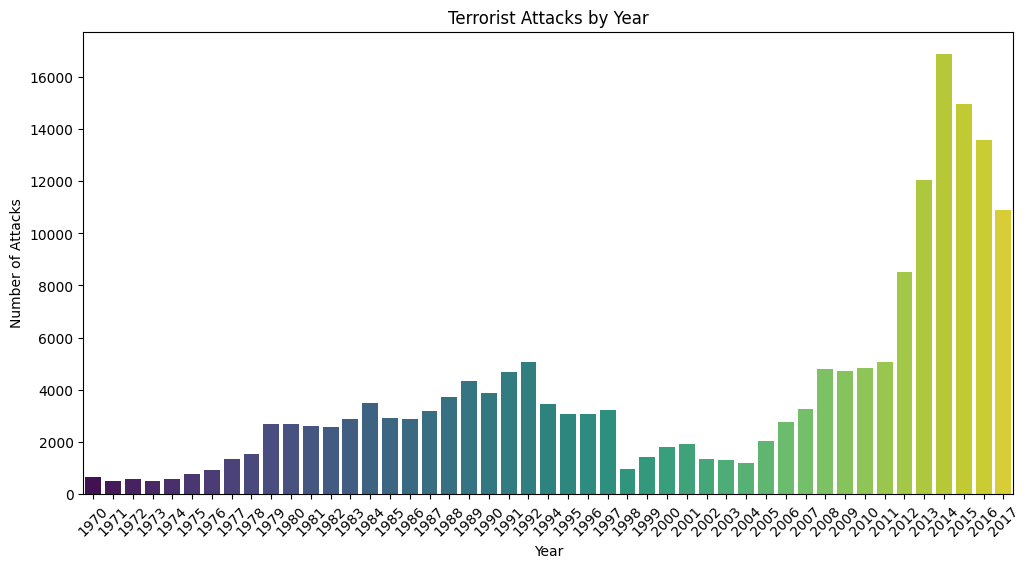

In [15]:
# Plotting a bar chart of terrorist attacks by year
plt.figure(figsize=(12, 6))
attacks_by_year = train_data['iyear'].value_counts().sort_index()
sns.barplot(x=attacks_by_year.index, y=attacks_by_year.values, palette='viridis')
plt.title('Terrorist Attacks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

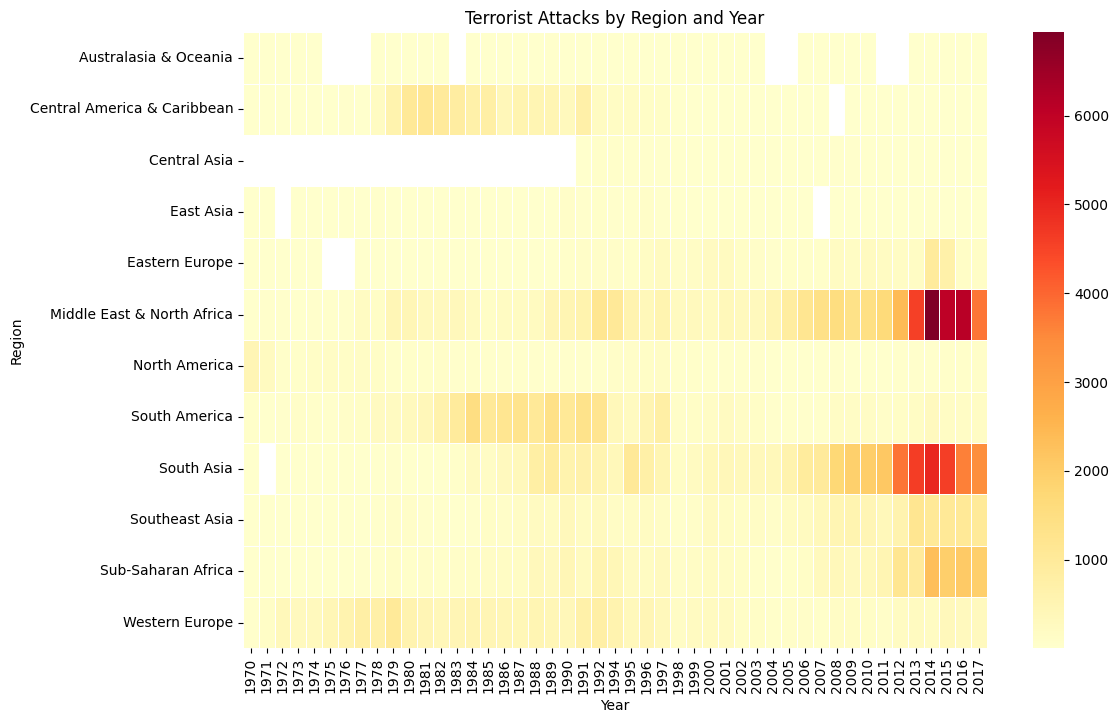

In [19]:
# Plotting a heatmap of terrorist attacks by region and year
attacks_by_region_year = train_data.groupby(['region_txt', 'iyear']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(attacks_by_region_year, cmap='YlOrRd', linewidths=0.5)
plt.title('Terrorist Attacks by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

In [20]:
# Finding hot zones of terrorism

hot_zones = train_data['country_txt'].value_counts().head(10)
print(hot_zones)


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64


In [21]:
# Analyzing attack types
attack_types = train_data['attacktype1_txt'].value_counts()
print(attack_types)

attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64


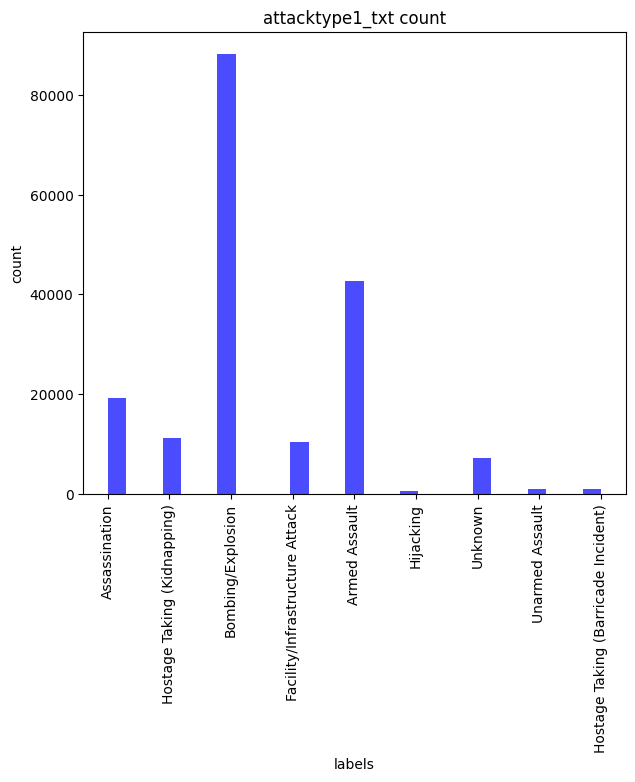

In [28]:
# Create a histogram of genre distribution
plt.figure(figsize=(7, 6))
plt.hist(train_data["attacktype1_txt"],bins =27 , color='blue', alpha=0.7)
plt.title("attacktype1_txt count")
plt.xlabel("labels")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

In [22]:
# Analyzing target types
target_types = train_data['targtype1_txt'].value_counts()
print(target_types)


targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64


In [25]:
# Analyzing weapon types used in attacks
weapon_types =train_data['weaptype1_txt'].value_counts()
print(weapon_types)


weaptype1_txt
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                       